In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.mixture import GaussianMixture
# from sklearn.metrics import accuracy_score, confusion_matrix
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split

# # Generate synthetic dataset
# X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# # Split the data into training, validation, and test sets
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# # Define different numbers of components for GMM
# n_components_list = [1, 2, 3, 4, 5]

# # Dictionary to store results
# results = {}

# # Function to evaluate the model and generate confusion matrix
# def evaluate_model(model, X, y):
#     # Predictions
#     y_pred = model.predict(X)

#     # Classification accuracy
#     accuracy = accuracy_score(y, y_pred)

#     # Confusion matrix
#     cm = confusion_matrix(y, y_pred)

#     return accuracy, cm

# # Function to plot decision regions
# def plot_decision_regions(X, y, model, title):
#     h = 0.02  # step size in the mesh
#     x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#     y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#     Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

#     # Put the result into a color plot
#     Z = Z.reshape(xx.shape)
#     plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)

#     # Plot the training points
#     plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolors='k')
#     plt.title(title)
#     plt.xlabel('Feature 1')
#     plt.ylabel('Feature 2')
#     plt.show()

# # Loop over different numbers of components for GMM
# for n_components in n_components_list:
#     # Train the GMM model
#     model = GaussianMixture(n_components=n_components, random_state=42)
#     model.fit(X_train)

#     # Evaluate the model on training data
#     train_accuracy, train_cm = evaluate_model(model, X_train, y_train)

#     # Evaluate the model on validation data
#     val_accuracy, val_cm = evaluate_model(model, X_val, y_val)

#     # Evaluate the model on test data
#     test_accuracy, test_cm = evaluate_model(model, X_test, y_test)

#     # Store results
#     results[n_components] = {
#         'train_accuracy': train_accuracy,
#         'val_accuracy': val_accuracy,
#         'test_accuracy': test_accuracy,
#         'train_cm': train_cm,
#         'val_cm': val_cm,
#         'test_cm': test_cm,
#         'model': model
#     }

# # Print the table of classification accuracies
# print("Classification Accuracies:")
# print("{:<15} {:<15} {:<15} {:<15}".format("Num Components", "Train Accuracy", "Validation Accuracy", "Test Accuracy"))
# for n_components, result in results.items():
#     print("{:<15} {:<15.2f} {:<15.2f} {:<15.2f}".format(n_components, result['train_accuracy'], result['val_accuracy'], result['test_accuracy']))

# # Plot confusion matrices
# def plot_confusion_matrix(cm, accuracy, title):
#     plt.figure(figsize=(6, 4))
#     plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
#     plt.title(title, fontsize=16)
#     plt.colorbar()
#     labels = ["0", "1"]
#     plt.xticks(range(2), labels)
#     plt.yticks(range(2), labels)
#     plt.xlabel("Predicted Label")
#     plt.ylabel("True Label")
#     plt.show()

# for n_components, result in results.items():
#     plot_confusion_matrix(result['train_cm'], result['train_accuracy'], title=f"Train (Num Components={n_components})")
#     plot_confusion_matrix(result['val_cm'], result['val_accuracy'], title=f"Validation (Num Components={n_components})")
#     plot_confusion_matrix(result['test_cm'], result['test_accuracy'], title=f"Test (Num Components={n_components})")

# # Plot decision regions
# for n_components, result in results.items():
#     plot_decision_regions(X_train, y_train, result['model'], title=f"Decision Regions (Num Components={n_components}, Train Data)")
#     plot_decision_regions(X_val, y_val, result['model'], title=f"Decision Regions (Num Components={n_components}, Validation Data)")
#     plot_decision_regions(X_test, y_test, result['model'], title=f"Decision Regions (Num Components={n_components}, Test Data)")


In [ ]:


# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn import datasets
# from sklearn.mixture import GaussianMixture
# from sklearn.decomposition import PCA


# # Step 2: Data Preparation
# # Load the wine dataset
# wine = datasets.load_wine()
# X = wine.data[:, :2]

# n_components = 2 # Number of clusters
# covariance_types = ['full', 'tied', 'diag', 'spherical']

# # Initialize GMM models for each covariance type
# gmm_models = {cov_type: GaussianMixture(n_components=n_components, covariance_type=cov_type)
# 			for cov_type in covariance_types}

# # Step 4: Fitting the GMM Models
# # Fit GMM models for each covariance type
# for cov_type, gmm_model in gmm_models.items():
# 	gmm_model.fit(X)

# covariances = {cov_type: gmm_model.covariances_
# 			for cov_type, gmm_model in gmm_models.items()}

# # Predict the cluster assignments for all data points
# predictions = {cov_type: gmm_model.predict(X)
# 			for cov_type, gmm_model in gmm_models.items()}

# # Plot the clusters for each covariance type
# plt.figure(figsize=(12, 8))

# for i, (cov_type, gmm_model) in enumerate(gmm_models.items(), 1):
# 	plt.subplot(2, 2, i)
# 	plt.scatter(X[:, 0], X[:, 1], c=predictions[cov_type], cmap='viridis', edgecolors='k', s=40)
# 	plt.title(f'GMM Clustering with {cov_type} Covariance')
# 	plt.xlabel('Feature 1')
# 	plt.ylabel('Feature 2')
# 	plt.colorbar()
	
# 	# Print the covariance matrix for the first component (adjust as needed)
# 	print(f'Covariance Matrix ({cov_type} - Component):\n{covariances[cov_type][0]}')

# plt.tight_layout()
# plt.show()


0
1
0
1
0
1
0
1
[0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0
 1 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1
 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1
 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1
 0 1 0 0 1 0 0 1 1 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1
 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 1 1
 1 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1
 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 0 1 1
 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 1 0
 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1
 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 0
 1 1 1 1 

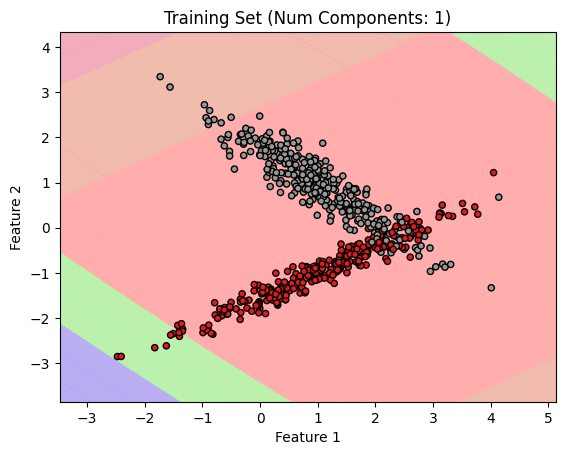

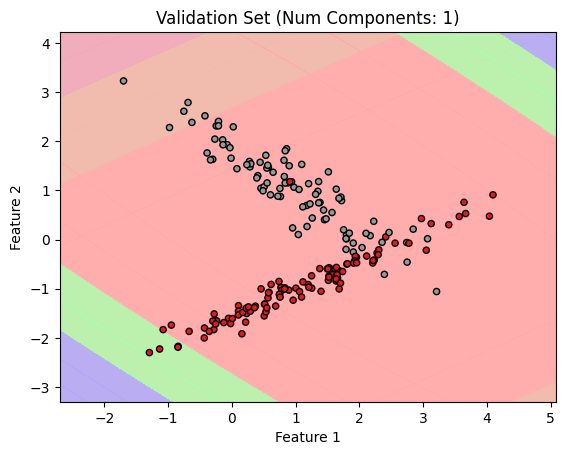

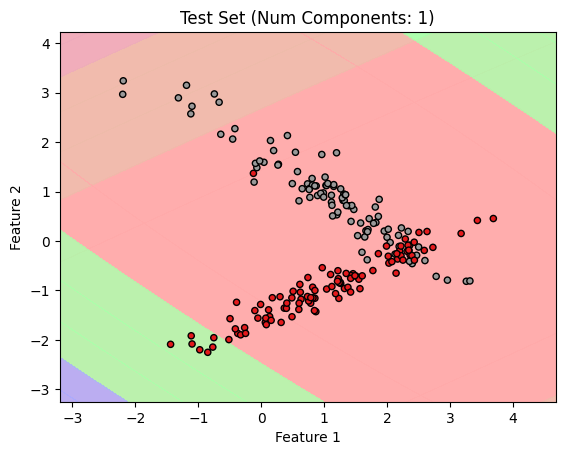

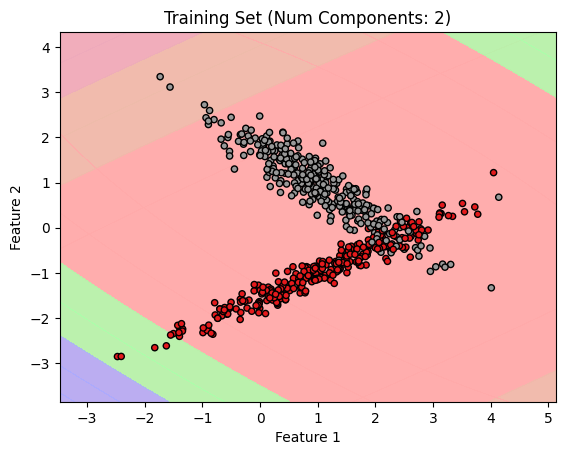

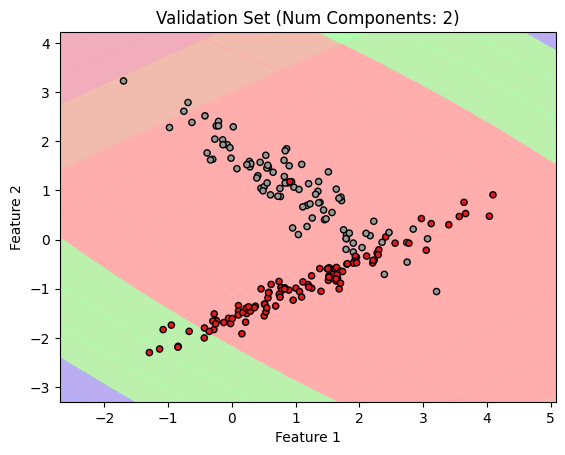

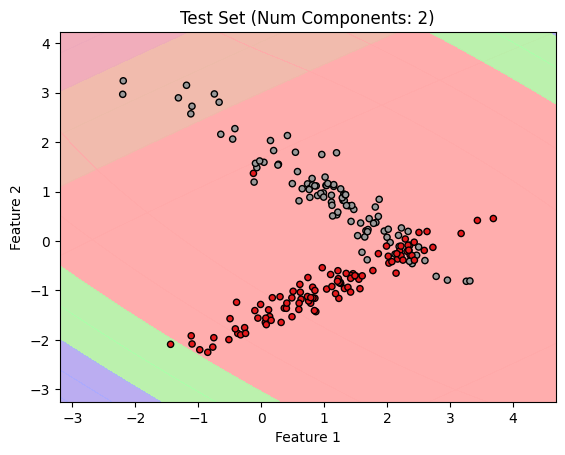

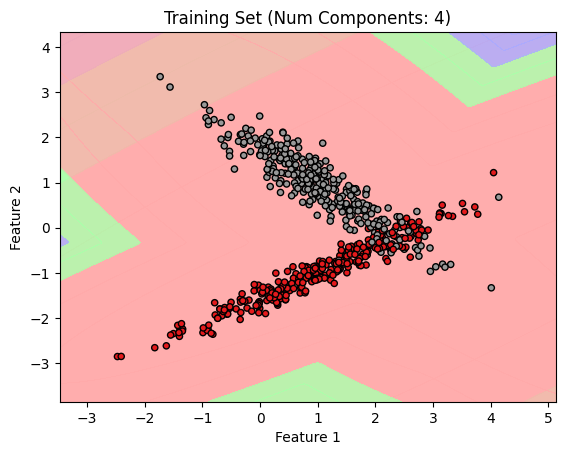

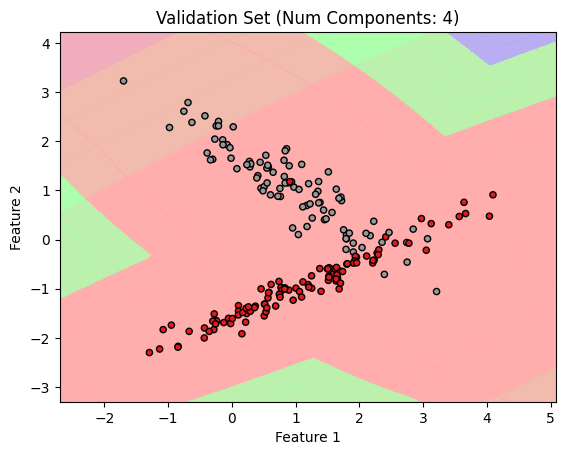

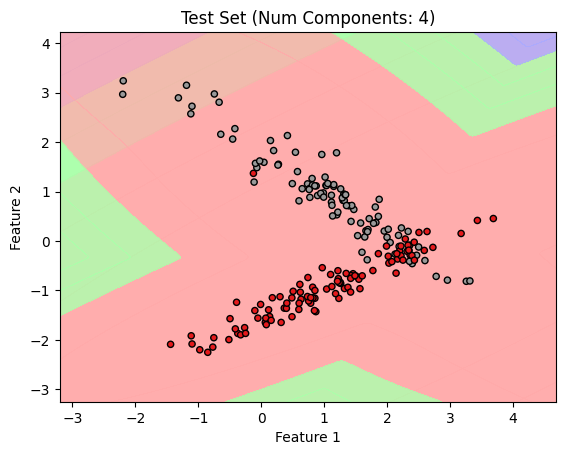

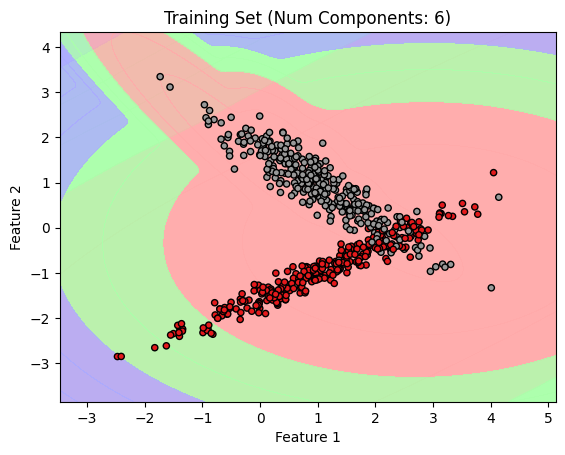

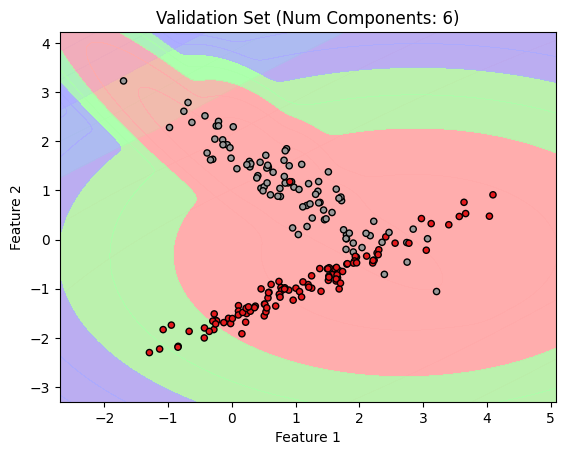

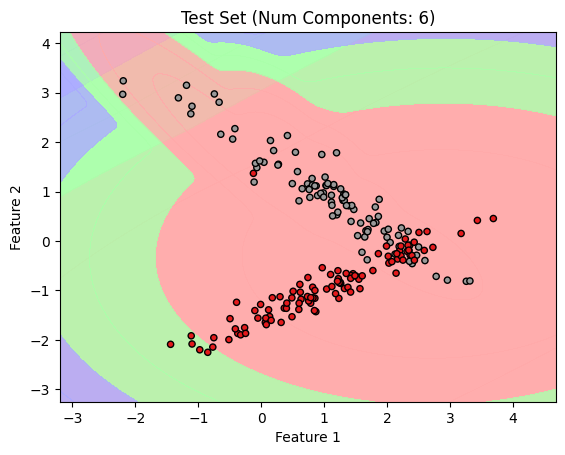

Confusion Matrices:
Number of Components: 1
Training Set:
[[280  10]
 [ 22 288]]
Validation Set:
[[104   3]
 [  6  87]]
Test Set:
[[100   4]
 [  7  89]]

Number of Components: 2
Training Set:
[[283   7]
 [ 24 286]]
Validation Set:
[[105   2]
 [  7  86]]
Test Set:
[[100   4]
 [  7  89]]

Number of Components: 4
Training Set:
[[282   8]
 [ 21 289]]
Validation Set:
[[105   2]
 [  8  85]]
Test Set:
[[100   4]
 [  7  89]]

Number of Components: 6
Training Set:
[[281   9]
 [ 22 288]]
Validation Set:
[[105   2]
 [  6  87]]
Test Set:
[[100   4]
 [  7  89]]



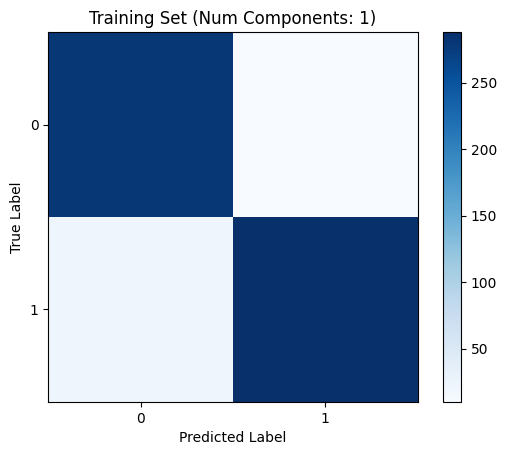

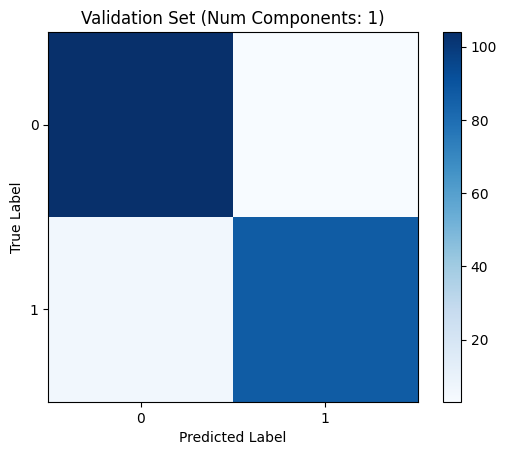

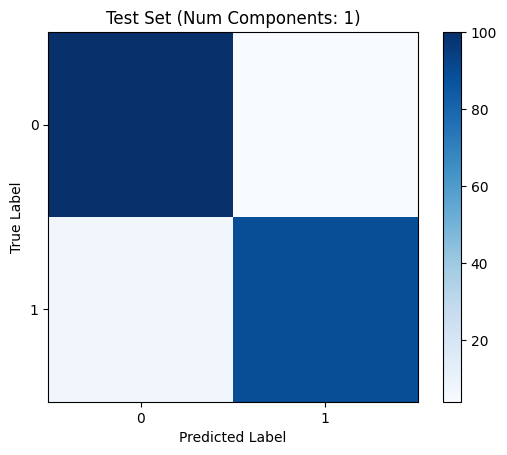

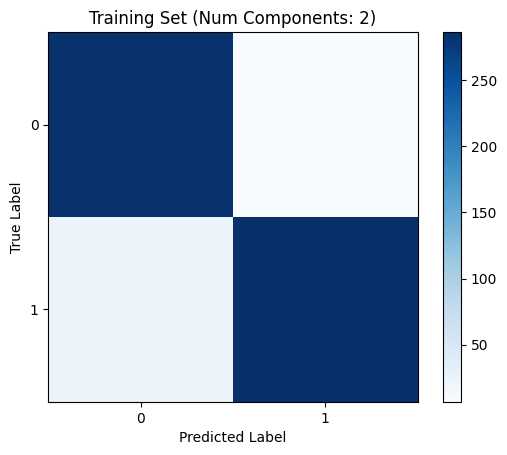

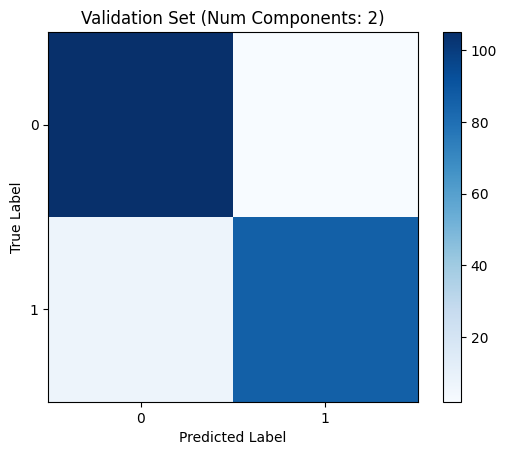

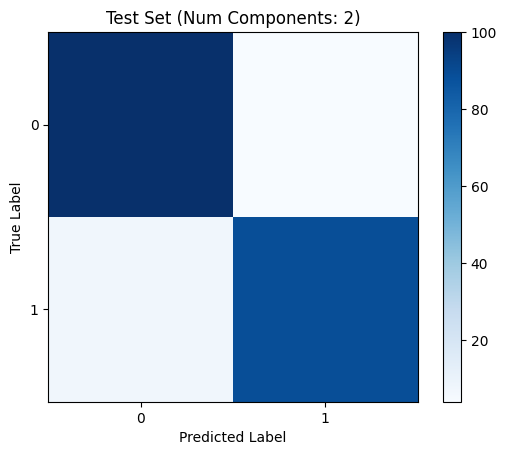

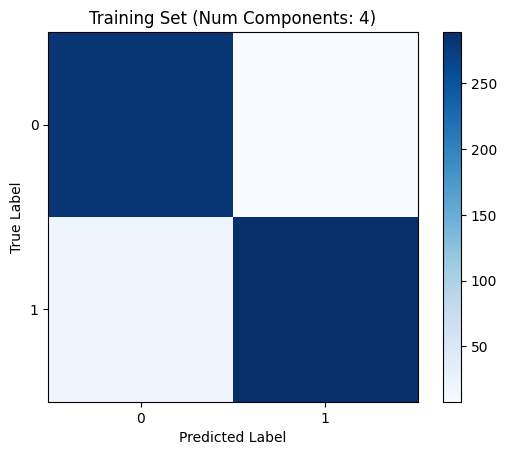

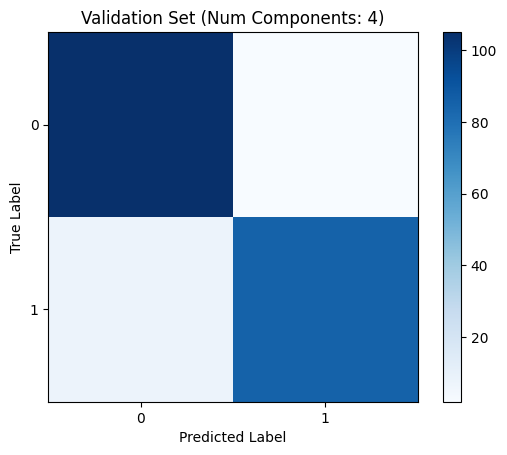

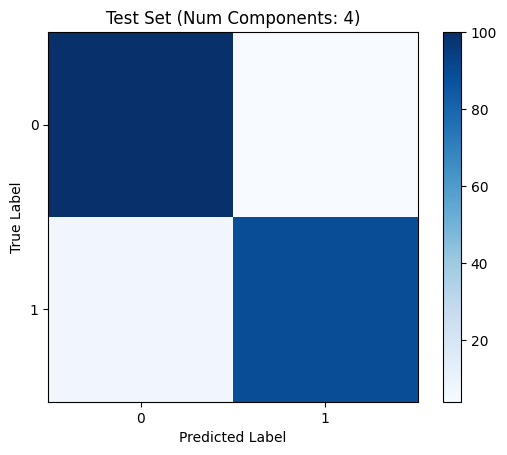

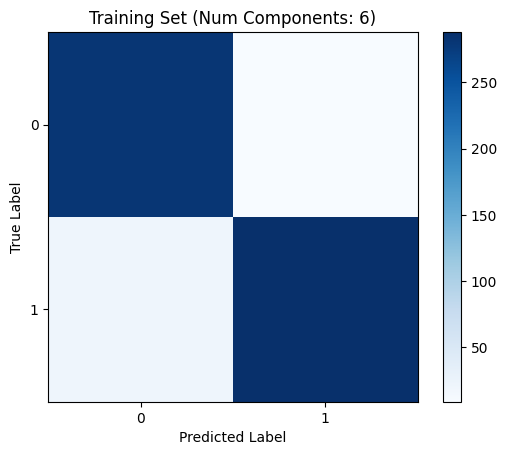

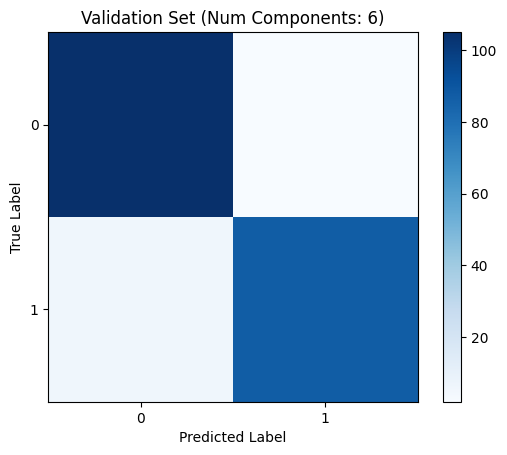

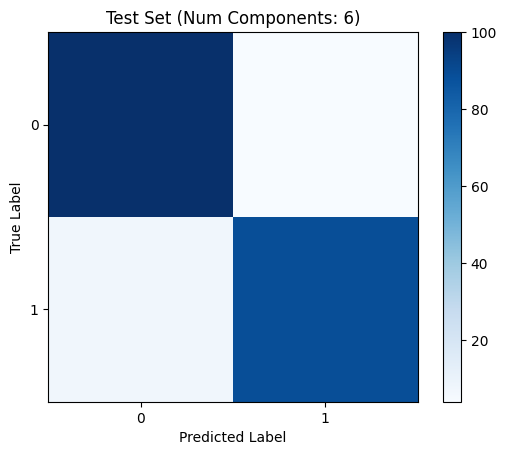

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib.colors import ListedColormap

# Step 1: Generate synthetic 2D data
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Split the data into training, validation, and test sets
X_train_val, test_x, y_train_val, test_y = train_test_split(X, y, test_size=0.2, random_state=42)
train_x, X_val, train_y, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Step 2: Define the number of Gaussian components per class
num_components_per_class = [1, 2, 4, 6]

# Step 3: Fit GMMs for each class with varying number of components
gmm_models = {}
for num_components in num_components_per_class:
    for class_label in np.unique(train_y):
        print(class_label)
        X_class = train_x[train_y == class_label]
        gmm = GaussianMixture(n_components=num_components, init_params='kmeans',covariance_type='full', random_state=42)
        gmm.fit(X_class)
        gmm_models[(num_components, class_label)] = gmm

# Step 4: Predict class labels and evaluate accuracies and create confusion matrices
train_accuracies = []
val_accuracies = []
test_accuracies = []

train_conf_matrices = []
val_conf_matrices = []
test_conf_matrices = []
print(train_y)

for num_components in num_components_per_class:
    train_preds = []
    val_preds = []
    test_preds = []

    for class_label in np.unique(train_y):
        gmm = gmm_models[(num_components, class_label)]
        
        train_probs = gmm.score_samples(train_x)
        val_probs = gmm.score_samples(X_val)
        test_probs = gmm.score_samples(test_x)
        
        train_preds.append(train_probs)
        val_preds.append(val_probs)
        test_preds.append(test_probs)
    
    train_preds = np.argmax(train_preds, axis=0)
    val_preds = np.argmax(val_preds, axis=0)
    test_preds = np.argmax(test_preds, axis=0)
    
    train_acc = accuracy_score(train_y, train_preds)
    val_acc = accuracy_score(y_val, val_preds)
    test_acc = accuracy_score(test_y, test_preds)
    
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    test_accuracies.append(test_acc)

    train_conf_matrix = confusion_matrix(train_y, train_preds)
    val_conf_matrix = confusion_matrix(y_val, val_preds)
    test_conf_matrix = confusion_matrix(test_y, test_preds)
    
    train_conf_matrices.append(train_conf_matrix)
    val_conf_matrices.append(val_conf_matrix)
    test_conf_matrices.append(test_conf_matrix)

# Print classification accuracies
print("Classification Accuracies:")
print("{:<20} {:<20} {:<20}".format("Num Components", "Train Accuracy", "Validation Accuracy"))
for i, num_components in enumerate(num_components_per_class):
    print("{:<20} {:<20.2f} {:<20.2f}".format(num_components, train_accuracies[i], val_accuracies[i]))

# Step 5: Plot decision regions
def plot_decision_regions(X, y, gmm_models, num_components, title):
    h = 0.02  # Step size in the mesh

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    fig, ax = plt.subplots()

    for class_label in np.unique(y):
        gmm = gmm_models[(num_components, class_label)]
        Z = -gmm.score_samples(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
        ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k', s=20)
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    plt.show()

# Plot decision regions for training, validation, and test sets
for i, num_components in enumerate(num_components_per_class):
    plot_decision_regions(train_x, train_y, gmm_models, num_components, f"Training Set (Num Components: {num_components})")
    plot_decision_regions(X_val, y_val, gmm_models, num_components, f"Validation Set (Num Components: {num_components})")
    plot_decision_regions(test_x, test_y, gmm_models, num_components, f"Test Set (Num Components: {num_components})")


# Print confusion matrices
print("Confusion Matrices:")
for i, num_components in enumerate(num_components_per_class):
    print(f"Number of Components: {num_components}")
    print("Training Set:")
    print(train_conf_matrices[i])
    print("Validation Set:")
    print(val_conf_matrices[i])
    print("Test Set:")
    print(test_conf_matrices[i])
    print()

# Plot confusion matrices
def plot_confusion_matrix(conf_matrix, title):
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks(np.arange(len(np.unique(y))), np.unique(y))
    plt.yticks(np.arange(len(np.unique(y))), np.unique(y))
    plt.show()

for i, num_components in enumerate(num_components_per_class):
    plot_confusion_matrix(train_conf_matrices[i], f"Training Set (Num Components: {num_components})")
    plot_confusion_matrix(val_conf_matrices[i], f"Validation Set (Num Components: {num_components})")
    plot_confusion_matrix(test_conf_matrices[i], f"Test Set (Num Components: {num_components})")

Accuracy: 0.8933333333333333
Confusion Matrix:
[[75  0  1  0]
 [ 8 51  5  5]
 [ 4  1 66  1]
 [ 4  3  0 76]]


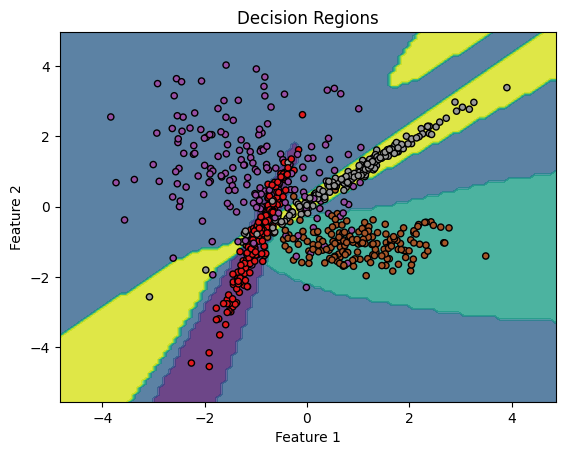

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, confusion_matrix

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=2, n_classes=4, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Split the data into training and test sets
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a GMM for each class
gmm_models = {}
for class_label in np.unique(train_y):
    X_class = train_x[train_y == class_label]
    gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
    gmm.fit(X_class)
    gmm_models[class_label] = gmm

# Prior probabilities for each class
class_counts = np.bincount(train_y)
prior_probs = class_counts / len(train_y)

# Calculate the likelihood for each class
def calculate_likelihood(X, gmm):
    return np.exp(gmm.score_samples(X))

# Predict the class for a single data point
def predict_class(x):
    likelihoods = []
    for class_label, gmm in gmm_models.items():
        likelihood = calculate_likelihood(x.reshape(1, -1), gmm)
        likelihoods.append(likelihood * prior_probs[class_label])
    return np.argmax(likelihoods)

# Predict the classes for the test set
y_pred = np.array([predict_class(x) for x in test_x])

# Calculate accuracy
accuracy = accuracy_score(test_y, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_mat = confusion_matrix(test_y, y_pred)
print("Confusion Matrix:")
print(conf_mat)

x_min, x_max = train_x[:, 0].min() - 1, train_x[:, 0].max() + 1
y_min, y_max = train_x[:, 1].min() - 1, train_x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict the class for each point on the mesh grid
Z = np.array([predict_class(np.array([x, y])) for x, y in np.c_[xx.ravel(), yy.ravel()]])
Z = Z.reshape(xx.shape)

# Plot the decision regions
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(train_x[:, 0], train_x[:, 1], c=train_y, cmap=plt.cm.Set1, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Regions')
plt.show()

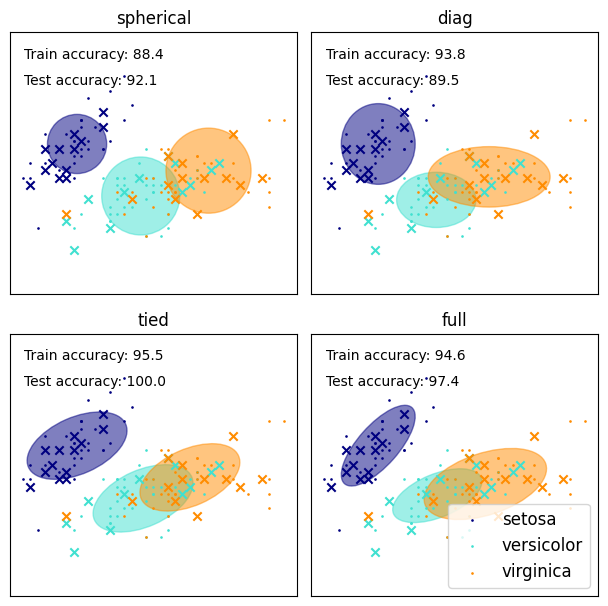

In [18]:
# Author: Ron Weiss <ronweiss@gmail.com>, Gael Varoquaux
# Modified by Thierry Guillemot <thierry.guillemot.work@gmail.com>
# License: BSD 3 clause

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

colors = ["navy", "turquoise", "darkorange"]


def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == "full":
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == "tied":
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == "diag":
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == "spherical":
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        ell = mpl.patches.Ellipse(
            gmm.means_[n, :2], v[0], v[1], angle=180 + angle, color=color
        )
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect("equal", "datalim")


iris = datasets.load_iris()

# Break up the dataset into non-overlapping training (75%) and testing
# (25%) sets.
skf = StratifiedKFold(n_splits=4)
# Only take the first fold.
train_index, test_index = next(iter(skf.split(iris.data, iris.target)))


train_x = iris.data[train_index]
train_y = iris.target[train_index]
test_x = iris.data[test_index]
test_y = iris.target[test_index]

n_classes = len(np.unique(train_y))

# Try GMMs using different types of covariances.
estimators = {
    cov_type: GaussianMixture(
        n_components=n_classes, covariance_type=cov_type, max_iter=20, random_state=0
    )
    for cov_type in ["spherical", "diag", "tied", "full"]
}

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(
    bottom=0.01, top=0.95, hspace=0.15, wspace=0.05, left=0.01, right=0.99
)


for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array(
        [train_x[train_y == i].mean(axis=0) for i in range(n_classes)]
    )

    # Train the other parameters using the EM algorithm.
    estimator.fit(train_x)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(
            data[:, 0], data[:, 1], s=0.8, color=color, label=iris.target_names[n]
        )
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = test_x[test_y == n]
        plt.scatter(data[:, 0], data[:, 1], marker="x", color=color)

    y_train_pred = estimator.predict(train_x)
    train_accuracy = np.mean(y_train_pred.ravel() == train_y.ravel()) * 100
    plt.text(0.05, 0.9, "Train accuracy: %.1f" % train_accuracy, transform=h.transAxes)

    y_test_pred = estimator.predict(test_x)
    test_accuracy = np.mean(y_test_pred.ravel() == test_y.ravel()) * 100
    plt.text(0.05, 0.8, "Test accuracy: %.1f" % test_accuracy, transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc="lower right", prop=dict(size=12))


plt.show()

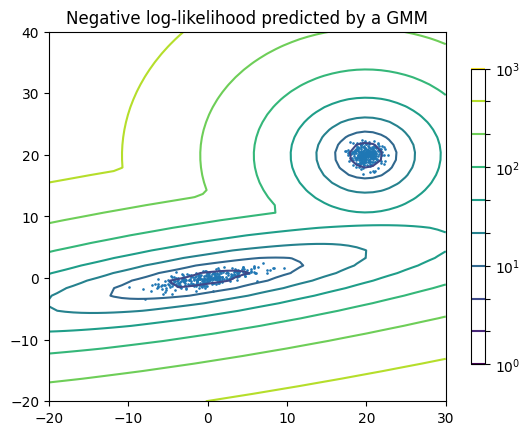

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

from sklearn import mixture

n_samples = 300

# generate random sample, two components
np.random.seed(0)

# generate spherical data centered on (20, 20)
shifted_gaussian = np.random.randn(n_samples, 2) + np.array([20, 20])

# generate zero centered stretched Gaussian data
C = np.array([[0.0, -0.7], [3.5, 0.7]])
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)

# concatenate the two datasets into the final training set
train_x = np.vstack([shifted_gaussian, stretched_gaussian])

# fit a Gaussian Mixture Model with two components
clf = mixture.GaussianMixture(n_components=2, covariance_type="full")
clf.fit(train_x)

# display predicted scores by the model as a contour plot
x = np.linspace(-20.0, 30.0)
y = np.linspace(-20.0, 40.0)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(
    X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10)
)
CB = plt.colorbar(CS, shrink=0.8, extend="both")
plt.scatter(train_x[:, 0], train_x[:, 1], 0.8)

plt.title("Negative log-likelihood predicted by a GMM")
plt.axis("tight")
plt.show()

[[0.14853843 0.35366395]
 [0.35366395 1.10967563]]
[[ 0.44460471 -0.04846419]
 [-0.04846419  0.24582595]]
[[0.15305445 0.01524717]
 [0.01524717 0.23773469]]
[[0.04450352 0.0361673 ]
 [0.0361673  0.28187673]]
[[ 0.4640158  -0.40297543]
 [-0.40297543  0.60096156]]
[[ 0.22917602 -0.43477925]
 [-0.43477925  0.93358679]]
[[0.22386762 0.52852873]
 [0.52852873 1.74839716]]
[[ 0.23856825 -0.61067775]
 [-0.61067775  1.76006525]]
[[ 0.08931067 -0.03021933]
 [-0.03021933  0.11290759]]
[[0.71178174 0.0286853 ]
 [0.0286853  0.00516373]]
[[ 1.61420858 -2.30391052]
 [-2.30391052  4.57419455]]
[[ 1.08219826 -2.16366792]
 [-2.16366792  5.00726297]]
[[0.96661742 2.07461339]
 [2.07461339 5.21717152]]
[[0.42340122 0.72459742]
 [0.72459742 2.10833424]]
[[5.00000000e-01 2.09486422e-17]
 [2.09486422e-17 5.00000000e-01]]
[[5.00000000e-01 2.09486422e-17]
 [2.09486422e-17 5.00000000e-01]]
[[5.00000000e-01 2.09486422e-17]
 [2.09486422e-17 5.00000000e-01]]
[[5.00000000e-01 2.09486422e-17]
 [2.09486422e-17 5.00000

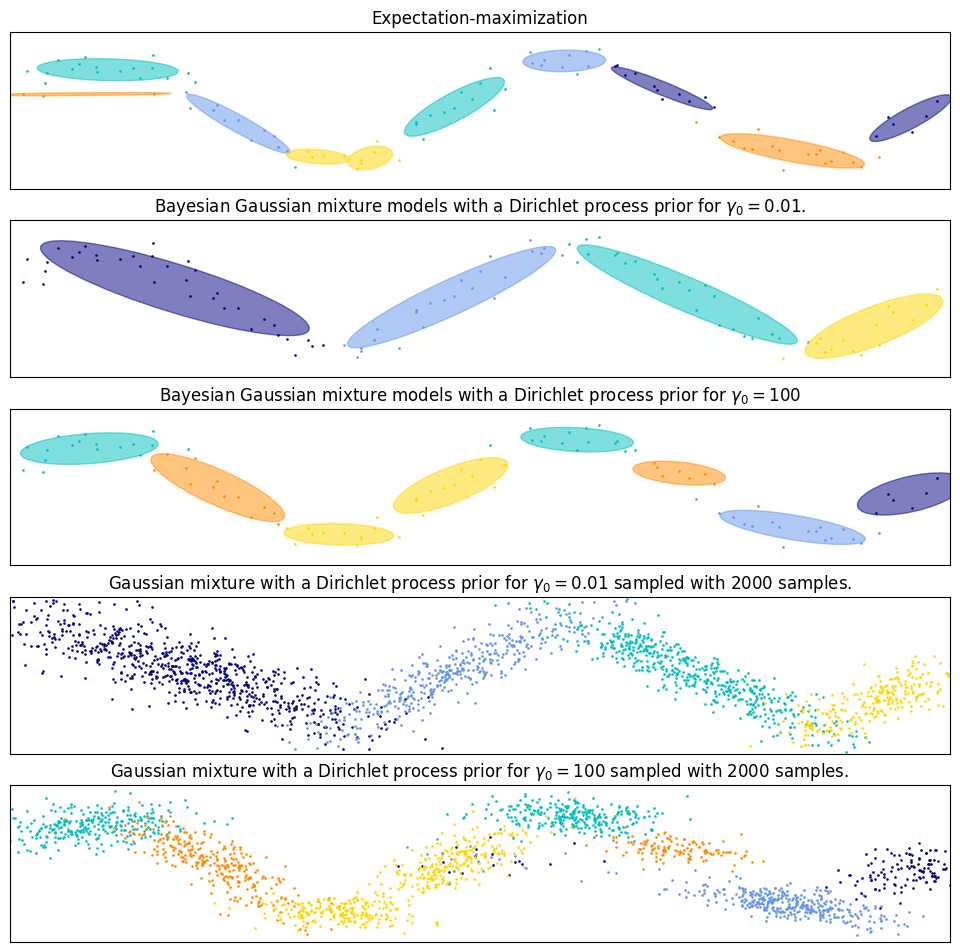

In [3]:
import itertools

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg

from sklearn import mixture

color_iter = itertools.cycle(["navy", "c", "cornflowerblue", "gold", "darkorange"])


def plot_results(X, Y, means, covariances, index, title):
    splot = plt.subplot(5, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(means, covariances, color_iter)):
        print(covar)

        v, w = linalg.eigh(covar)
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y == i):
            continue
        plt.scatter(X[Y == i, 0], X[Y == i, 1], 0.8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180.0 * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], angle=180.0 + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    plt.xlim(-6.0, 4.0 * np.pi - 6.0)
    plt.ylim(-5.0, 5.0)
    plt.title(title)
    plt.xticks(())
    plt.yticks(())


def plot_samples(X, Y, n_components, index, title):
    plt.subplot(5, 1, 4 + index)
    for i, color in zip(range(n_components), color_iter):
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y == i):
            continue
        plt.scatter(X[Y == i, 0], X[Y == i, 1], 0.8, color=color)

    plt.xlim(-6.0, 4.0 * np.pi - 6.0)
    plt.ylim(-5.0, 5.0)
    plt.title(title)
    plt.xticks(())
    plt.yticks(())


# Parameters
n_samples = 100

# Generate random sample following a sine curve
np.random.seed(0)
X = np.zeros((n_samples, 2))
step = 4.0 * np.pi / n_samples

for i in range(X.shape[0]):
    x = i * step - 6.0
    X[i, 0] = x + np.random.normal(0, 0.1)
    X[i, 1] = 3.0 * (np.sin(x) + np.random.normal(0, 0.2))

plt.figure(figsize=(10, 10))
plt.subplots_adjust(
    bottom=0.04, top=0.95, hspace=0.2, wspace=0.05, left=0.03, right=0.97
)

# Fit a Gaussian mixture with EM using ten components
gmm = mixture.GaussianMixture(
    n_components=10, covariance_type="full", max_iter=100
).fit(X)
plot_results(
    X, gmm.predict(X), gmm.means_, gmm.covariances_, 0, "Expectation-maximization"
)

dpgmm = mixture.BayesianGaussianMixture(
    n_components=10,
    covariance_type="full",
    weight_concentration_prior=1e-2,
    weight_concentration_prior_type="dirichlet_process",
    mean_precision_prior=1e-2,
    covariance_prior=1e0 * np.eye(2),
    init_params="random",
    max_iter=100,
    random_state=2,
).fit(X)
plot_results(
    X,
    dpgmm.predict(X),
    dpgmm.means_,
    dpgmm.covariances_,
    1,
    "Bayesian Gaussian mixture models with a Dirichlet process prior "
    r"for $\gamma_0=0.01$.",
)

X_s, y_s = dpgmm.sample(n_samples=2000)
plot_samples(
    X_s,
    y_s,
    dpgmm.n_components,
    0,
    "Gaussian mixture with a Dirichlet process prior "
    r"for $\gamma_0=0.01$ sampled with $2000$ samples.",
)

dpgmm = mixture.BayesianGaussianMixture(
    n_components=10,
    covariance_type="full",
    weight_concentration_prior=1e2,
    weight_concentration_prior_type="dirichlet_process",
    mean_precision_prior=1e-2,
    covariance_prior=1e0 * np.eye(2),
    init_params="kmeans",
    max_iter=100,
    random_state=2,
).fit(X)
plot_results(
    X,
    dpgmm.predict(X),
    dpgmm.means_,
    dpgmm.covariances_,
    2,
    "Bayesian Gaussian mixture models with a Dirichlet process prior "
    r"for $\gamma_0=100$",
)

X_s, y_s = dpgmm.sample(n_samples=2000)
plot_samples(
    X_s,
    y_s,
    dpgmm.n_components,
    1,
    "Gaussian mixture with a Dirichlet process prior "
    r"for $\gamma_0=100$ sampled with $2000$ samples.",
)

plt.show()

Classification Accuracies:
Num Gaussians   Train Accuracy       Validation Accuracy  Test Accuracy       
1               0.96                 0.95                 0.93                
2               0.96                 0.95                 0.93                
3               0.96                 0.95                 0.93                
4               0.96                 0.95                 0.94                
5               0.96                 0.95                 0.93                


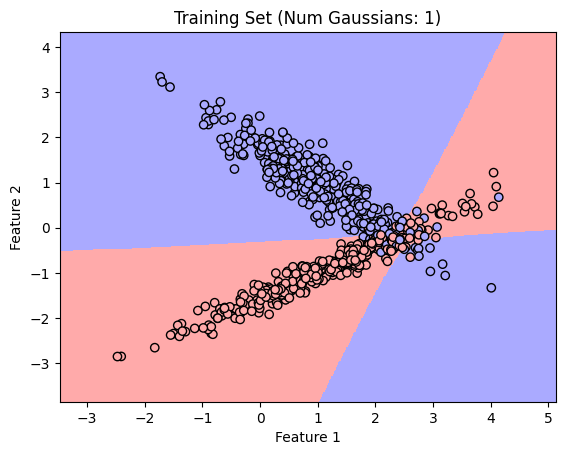

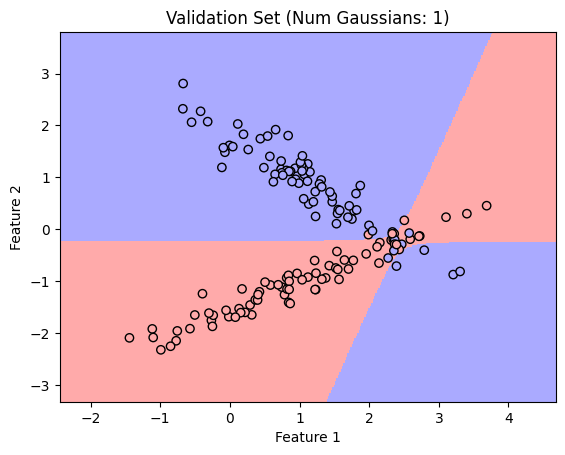

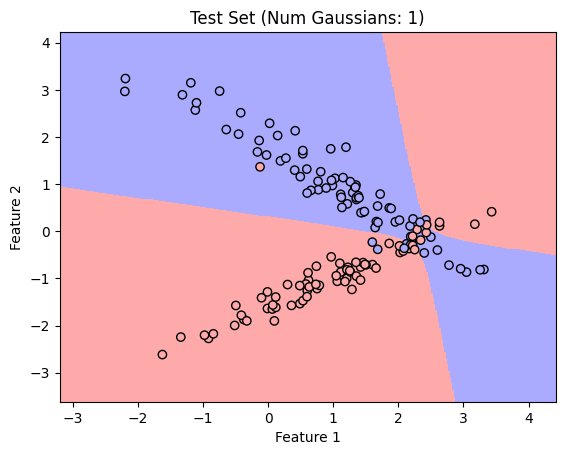

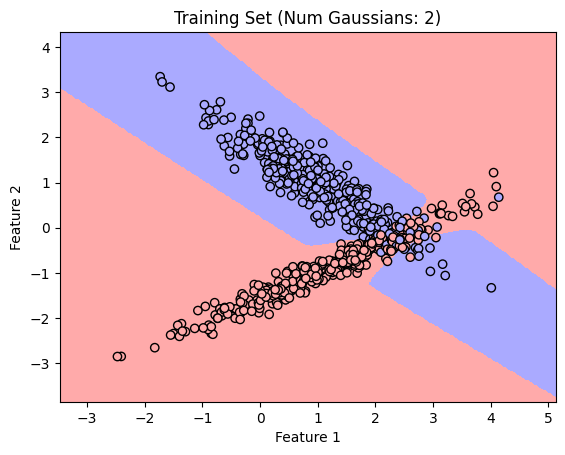

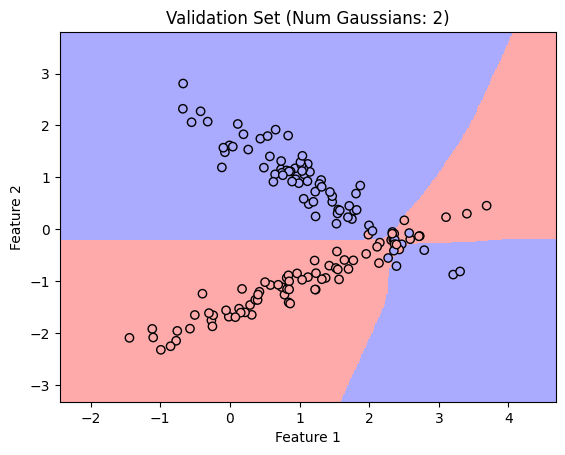

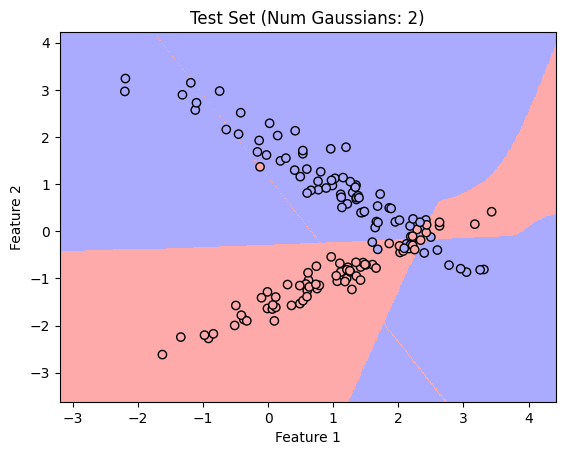

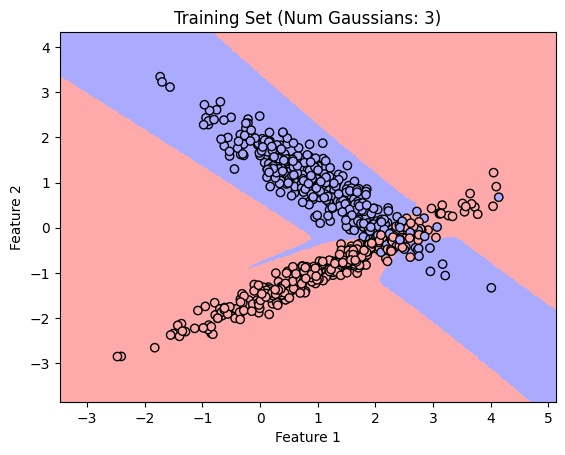

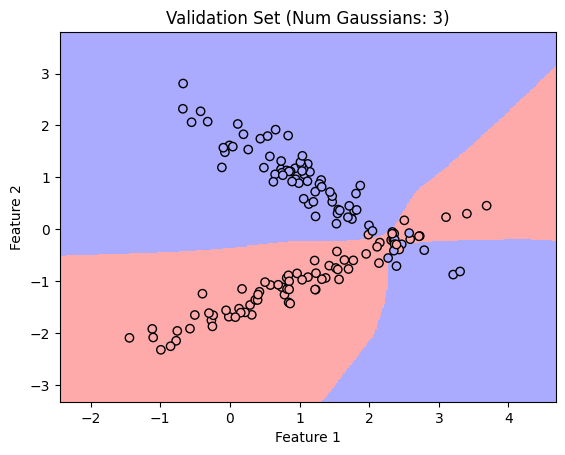

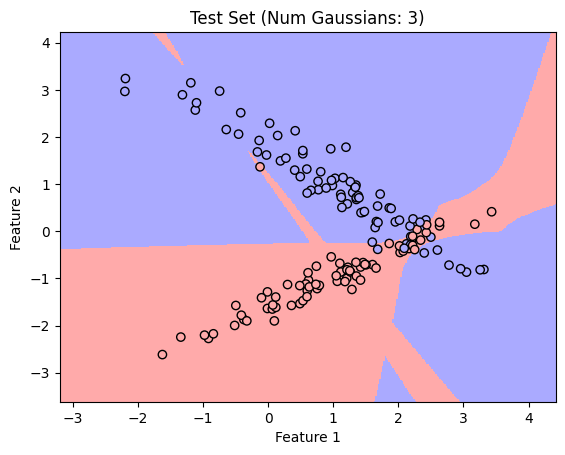

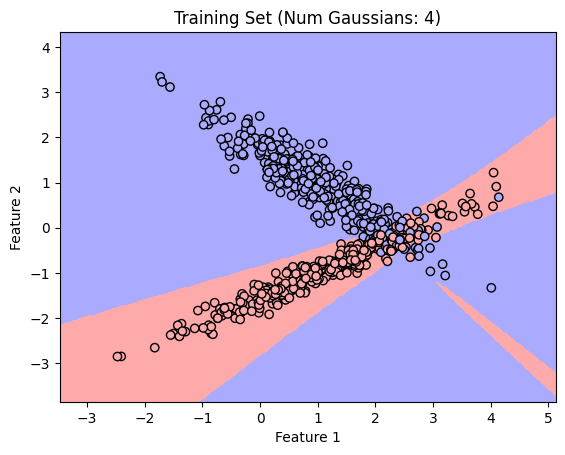

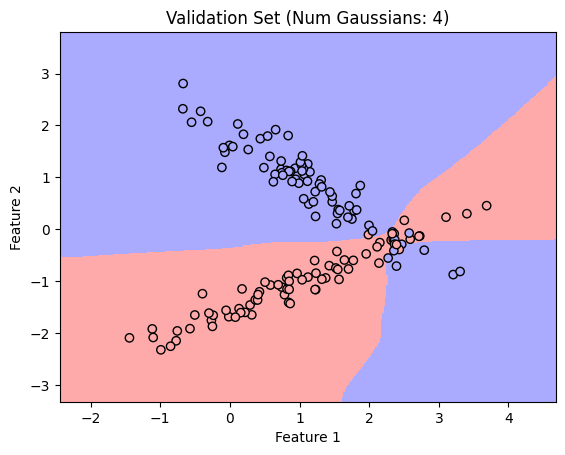

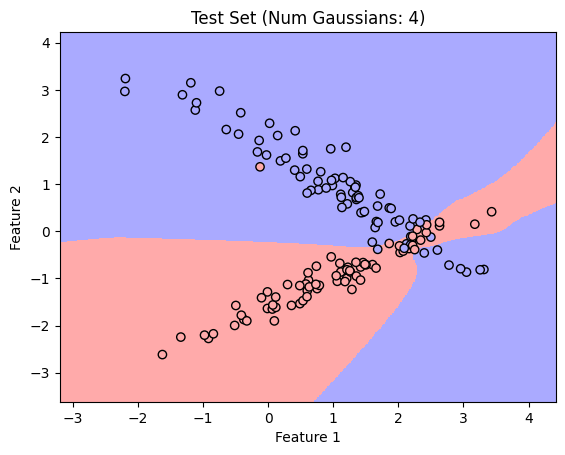

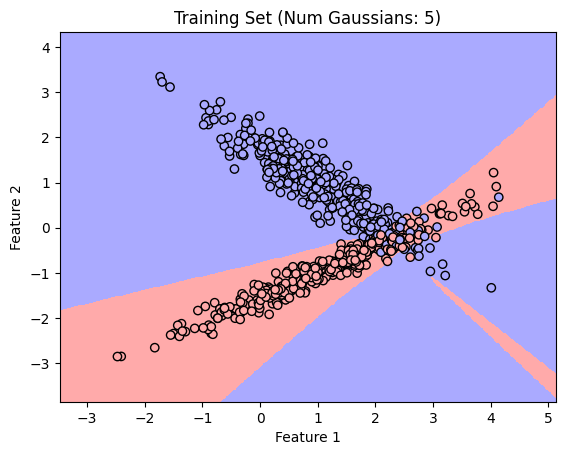

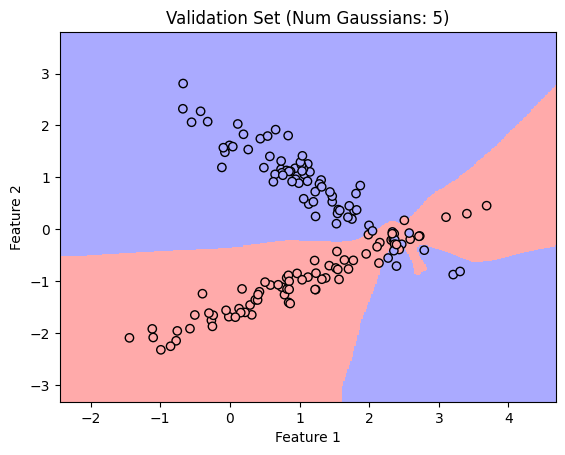

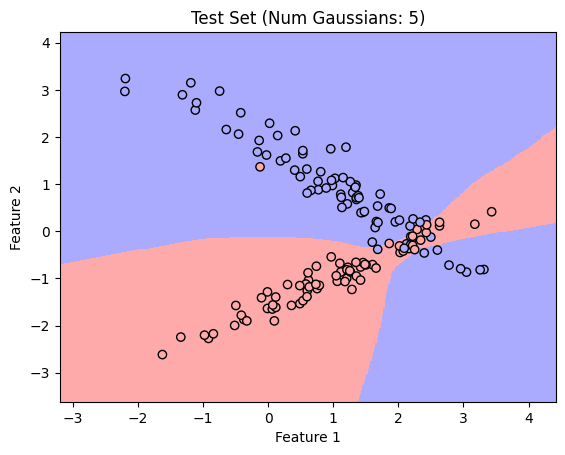

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib.colors import ListedColormap

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Split the data into training, validation, and test sets
train_x, X_temp, train_y, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, test_x, y_val, test_y = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define different numbers of Gaussians per class
num_gaussians_per_class = [1, 2, 3, 4, 5]

# Dictionary to store results
results = {}

# Function to train GMM models
def train_gmm(X, y, num_gaussians):
    gmms = []
    for class_label in np.unique(y):
        X_class = X[y == class_label]
        gmm = GaussianMixture(n_components=num_gaussians, random_state=42)
        gmm.fit(X_class)
        gmms.append(gmm)
    return gmms

# Function to predict class using trained GMM models
def predict_class(X, gmms):
    scores = [gmm.score_samples(X) for gmm in gmms]
    predicted_class = np.argmax(scores, axis=0)
    return predicted_class

# Loop over different numbers of Gaussians per class
for num_gaussians in num_gaussians_per_class:
    # Train GMM models
    gmms = train_gmm(train_x, train_y, num_gaussians)
    
    # Predictions on training, validation, and test data
    y_train_pred = predict_class(train_x, gmms)
    y_val_pred = predict_class(X_val, gmms)
    y_test_pred = predict_class(test_x, gmms)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(train_y, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_accuracy = accuracy_score(test_y, y_test_pred)
    
    # Confusion matrices
    train_cm = confusion_matrix(train_y, y_train_pred)
    val_cm = confusion_matrix(y_val, y_val_pred)
    test_cm = confusion_matrix(test_y, y_test_pred)
    
    # Store results
    results[num_gaussians] = {
        'train_accuracy': train_accuracy,
        'val_accuracy': val_accuracy,
        'test_accuracy': test_accuracy,
        'train_cm': train_cm,
        'val_cm': val_cm,
        'test_cm': test_cm
    }

# Print classification accuracies
print("Classification Accuracies:")
print("{:<15} {:<20} {:<20} {:<20}".format("Num Gaussians", "Train Accuracy", "Validation Accuracy", "Test Accuracy"))
for num_gaussians, result in results.items():
    print("{:<15} {:<20.2f} {:<20.2f} {:<20.2f}".format(num_gaussians, result['train_accuracy'], result['val_accuracy'], result['test_accuracy']))

# Function to plot decision regions
def plot_decision_regions(X, y, gmms, num_gaussians, title):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    h = 0.02  # step size in the mesh

    # Create meshgrid of points
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the class for each point on the mesh grid
    Z = predict_class(np.c_[xx.ravel(), yy.ravel()], gmms)
    Z = Z.reshape(xx.shape)

    # Plot the decision boundaries and data points
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=cmap_light)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

# Plot decision regions for training, validation, and test data
for num_gaussians, result in results.items():
    plot_decision_regions(train_x, train_y, train_gmm(train_x, train_y, num_gaussians), num_gaussians, f"Training Set (Num Gaussians: {num_gaussians})")
    plot_decision_regions(X_val, y_val, train_gmm(X_val, y_val, num_gaussians), num_gaussians, f"Validation Set (Num Gaussians: {num_gaussians})")
    plot_decision_regions(test_x, test_y, train_gmm(test_x, test_y, num_gaussians), num_gaussians, f"Test Set (Num Gaussians: {num_gaussians})")


In [1]:
import numpy as np

# Original matrix
original_matrix = np.array([[1, 2, 3],
                            [4, 5, 6]])

# Determine the desired size of the square matrix
desired_size = max(original_matrix.shape)

# If the original matrix is larger than desired size, truncate or reshape
if desired_size < original_matrix.shape[0] or desired_size < original_matrix.shape[1]:
    original_matrix = original_matrix[:desired_size, :desired_size]

# If the original matrix is smaller than desired size, fill with zeros
if desired_size > original_matrix.shape[0] or desired_size > original_matrix.shape[1]:
    padded_matrix = np.zeros((desired_size, desired_size))
    padded_matrix[:original_matrix.shape[0], :original_matrix.shape[1]] = original_matrix
    square_matrix = padded_matrix
else:
    square_matrix = original_matrix

print("Original Matrix:")
print(original_matrix)

print("\nSquare Matrix:")
print(square_matrix)


Original Matrix:
[[1 2 3]
 [4 5 6]]

Square Matrix:
[[1. 2. 3.]
 [4. 5. 6.]
 [0. 0. 0.]]


IndexError: index 1 is out of bounds for axis 0 with size 1

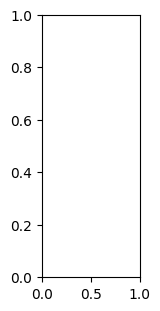

In [13]:
# Author: Ron Weiss <ronweiss@gmail.com>, Gael Varoquaux
# Modified by Thierry Guillemot <thierry.guillemot.work@gmail.com>
# License: BSD 3 clause

import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

colors = ["navy", "turquoise", "darkorange"]


def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == "full":
            covariances = gmm.covariances_[n][:1, :1]
        elif gmm.covariance_type == "tied":
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == "diag":
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == "spherical":
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        ell = mpl.patches.Ellipse(
            gmm.means_[n, :2], v[0], v[1], angle=180 + angle, color=color
        )
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect("equal", "datalim")



def read_dataset_2(current_directory, folder_number):
    # classification_dataset_2_path=current_directory+ "/Datasets_for_A1/Classification/Dataset 1/" + folder_number + "/"
    classification_dataset_2_path = (
        "/home/dipendu/programs/mtech_2023/ml/ass2/Datasets_for_A1/Classification/Dataset 2/"
        + folder_number
        + "/"
    )

    classification_dataset_2_Train = (
        classification_dataset_2_path + "Train-" + folder_number + ".csv"
    )
    df = pd.read_csv(classification_dataset_2_Train)
    data = df.to_numpy()
    train_x = data[:, 1:3]
    train_y = data[:, 3]

    classification_dataset_2_Validation = (
        classification_dataset_2_path + "Val-" + folder_number + ".csv"
    )
    df = pd.read_csv(classification_dataset_2_Validation)
    data = df.to_numpy()
    val_x = data[:, 1:3]
    val_y = data[:, 3]

    classification_dataset_2_Test = (
        classification_dataset_2_path + "Test-" + folder_number + ".csv"
    )
    df = pd.read_csv(classification_dataset_2_Test)
    data = df.to_numpy()
    test_x = data[:, 1:3]
    test_y = data[:, 3]

    return train_x, train_y, val_x, val_y, test_x, test_y




folder_number = "9"
current_directory = os.getcwd()

train_x, train_y, val_x, val_y, test_x, test_y = read_dataset_2(
    current_directory, folder_number
)

n_classes = len(np.unique(train_y))

# Try GMMs using different types of covariances.
estimators = {
    cov_type: GaussianMixture(
        n_components=n_classes, covariance_type=cov_type, max_iter=20, random_state=0
    )
    for cov_type in ["full"]
}

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(
    bottom=0.01, top=0.95, hspace=0.15, wspace=0.05, left=0.01, right=0.99
)


for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array(
        [train_x[train_y == i].mean(axis=0) for i in range(n_classes)]
    )

    # Train the other parameters using the EM algorithm.
    estimator.fit(train_x)

    h = plt.subplot(2, 1, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(
            data[:, 0], data[:, 1], s=0.8, color=color, label=iris.target_names[n]
        )
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = test_x[test_y == n]
        plt.scatter(data[:, 0], data[:, 1], marker="x", color=color)

    y_train_pred = estimator.predict(train_x)
    train_accuracy = np.mean(y_train_pred.ravel() == train_y.ravel()) * 100
    plt.text(0.05, 0.9, "Train accuracy: %.1f" % train_accuracy, transform=h.transAxes)

    y_test_pred = estimator.predict(test_x)
    test_accuracy = np.mean(y_test_pred.ravel() == test_y.ravel()) * 100
    plt.text(0.05, 0.8, "Test accuracy: %.1f" % test_accuracy, transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc="lower right", prop=dict(size=12))


plt.show()